In [1]:
#Import des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Configuration de l'affichage des graphiques
%matplotlib inline

In [2]:
#Chargement du dataset
file_path = 'spam_ham_dataset.csv'
spam_df = pd.read_csv(file_path)

In [3]:
#Premier aperçu des données
print("Aperçu des premières lignes du dataset :")
pd.set_option('display.max_colwidth', None)
display(spam_df.head())

Aperçu des premières lignes du dataset :


,Unnamed: 0,label,text,label_num
0,605,ham,"Subject: enron methanol ; meter # : 988291\r\nthis is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary\r\nflow data provided by daren } .\r\nplease override pop ' s daily volume { presently zero } to reflect daily\r\nactivity you can obtain from gas control .\r\nthis change is needed asap for economics purposes .",0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see attached file : hplnol 09 . xls )\r\n- hplnol 09 . xls",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re around to that most wonderful time of the year - - - neon leaders retreat time !\r\ni know that this time of year is extremely hectic , and that it ' s tough to think about anything past the holidays , but life does go on past the week of december 25 through january 1 , and that ' s what i ' d like you to think about for a minute .\r\non the calender that i handed out at the beginning of the fall semester , the retreat was scheduled for the weekend of january 5 - 6 . but because of a youth ministers conference that brad and dustin are connected with that week , we ' re going to change the date to the following weekend , january 12 - 13 . now comes the part you need to think about .\r\ni think we all agree that it ' s important for us to get together and have some time to recharge our batteries before we get to far into the spring semester , but it can be a lot of trouble and difficult for us to get away without kids , etc . so , brad came up with a potential alternative for how we can get together on that weekend , and then you can let me know which you prefer .\r\nthe first option would be to have a retreat similar to what we ' ve done the past several years . this year we could go to the heartland country inn ( www . . com ) outside of brenham . it ' s a nice place , where we ' d have a 13 - bedroom and a 5 - bedroom house side by side . it ' s in the country , real relaxing , but also close to brenham and only about one hour and 15 minutes from here . we can golf , shop in the antique and craft stores in brenham , eat dinner together at the ranch , and spend time with each other . we ' d meet on saturday , and then return on sunday morning , just like what we ' ve done in the past .\r\nthe second option would be to stay here in houston , have dinner together at a nice restaurant , and then have dessert and a time for visiting and recharging at one of our homes on that saturday evening . this might be easier , but the trade off would be that we wouldn ' t have as much time together . i ' ll let you decide .\r\nemail me back with what would be your preference , and of course if you ' re available on that weekend . the democratic process will prevail - - majority vote will rule ! let me hear from you as soon as possible , preferably by the end of the weekend . and if the vote doesn ' t go your way , no complaining allowed ( like i tend to do ! )\r\nhave a great weekend , great golf , great fishing , great shopping , or whatever makes you happy !\r\nbobby",0
3,4685,spam,"Subject: photoshop , windows , office . cheap . main trending\r\nabasements darer prudently fortuitous undergone\r\nlighthearted charm orinoco taster\r\nrailroad affluent pornographic cuvier\r\nirvin parkhouse blameworthy chlorophyll\r\nrobed diagrammatic fogarty clears bayda\r\ninconveniencing managing represented smartness hashish\r\nacademies shareholders unload badness\r\ndanielson pure caffein\r\nspaniard chargeable levin\r\n",1
4,2030,ham,"Subject: re : indian springs\r\nthis deal is to book the teco pvr revenue . it is my understanding that teco\r\njust sends us a check , i haven ' t received an answer as to whether there is a\r\npredermined price associated with this deal or if teco just lets us know what\r\nwe are giving . i can continue to chase this deal down if you need .",0


In [4]:
#Informations générales sur le dataset
print("\nInformations sur le dataset :")
spam_df.info()


Informations sur le dataset :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [5]:
#Statistiques descriptives
print("\nStatistiques descriptives :")
display(spam_df.describe())


Statistiques descriptives :


,Unnamed: 0,label_num
count,5171.000000,5171.000000
mean,2585.000000,0.289886
std,1492.883452,0.453753
min,0.000000,0.000000
25%,1292.500000,0.000000
50%,2585.000000,0.000000
75%,3877.500000,1.000000
max,5170.000000,1.000000


In [6]:
#Nombre de lignes et de colonnes
print(f"Le dataset contient {spam_df.shape[0]} lignes et {spam_df.shape[1]} colonnes.\n")

Le dataset contient 5171 lignes et 4 colonnes.



In [7]:
#Noms des colonnes
print("Noms des colonnes du dataset :")
print(spam_df.columns)

Noms des colonnes du dataset :
Index(['Unnamed: 0', 'label', 'text', 'label_num'], dtype='object')


In [8]:
#Nombre de valeurs manquantes dans chaque colonne
print("\nNombre de valeurs manquantes par colonne :")
print(spam_df.isnull().sum())


Nombre de valeurs manquantes par colonne :
Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64


In [9]:
#Analyse de la répartition des classes (spam vs ham)
print("Répartition des classes :")
print(spam_df['label'].value_counts())

Répartition des classes :
label
ham     3672
spam    1499
Name: count, dtype: int64


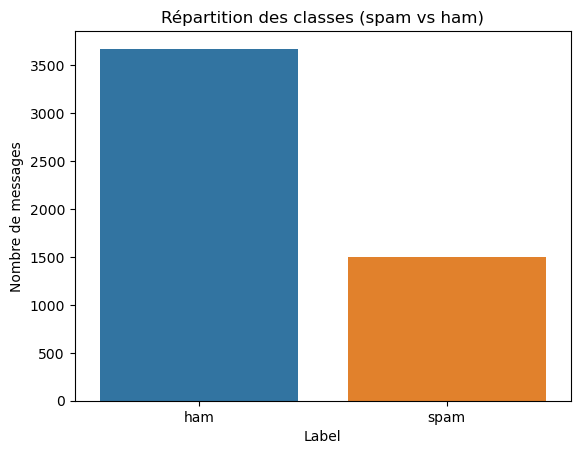

In [10]:
#Visualisation de cette répartition
sns.countplot(x='label', data=spam_df)
plt.title("Répartition des classes (spam vs ham)")
plt.xlabel("Label")
plt.ylabel("Nombre de messages")
plt.show()

In [11]:
#Suppression de la colonne "Unnamed 0"
spam_df.drop(columns=['Unnamed: 0'], inplace=True)

In [12]:
import re

#Fonction de nettoyage des textes
def clean_text(text):
    text = text.lower() #Passage en minuscules
    text = re.sub(r'[^a-z\s]', '', text) #On supprime les caractères non alphabétiques
    return text

In [13]:
#Application du nettoyage sur la colonne "text"
spam_df['cleaned_text'] = spam_df['text'].apply(clean_text)

#Affichage des premières lignes du dataset après nettoyage
print("Aperçu des données après nettoyage :")
display(spam_df.head())

Aperçu des données après nettoyage :


,label,text,label_num,cleaned_text
0,ham,"Subject: enron methanol ; meter # : 988291\r\nthis is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary\r\nflow data provided by daren } .\r\nplease override pop ' s daily volume { presently zero } to reflect daily\r\nactivity you can obtain from gas control .\r\nthis change is needed asap for economics purposes .",0,subject enron methanol meter \r\nthis is a follow up to the note i gave you on monday preliminary\r\nflow data provided by daren \r\nplease override pop s daily volume presently zero to reflect daily\r\nactivity you can obtain from gas control \r\nthis change is needed asap for economics purposes
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see attached file : hplnol 09 . xls )\r\n- hplnol 09 . xls",0,subject hpl nom for january \r\n see attached file hplnol xls \r\n hplnol xls
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re around to that most wonderful time of the year - - - neon leaders retreat time !\r\ni know that this time of year is extremely hectic , and that it ' s tough to think about anything past the holidays , but life does go on past the week of december 25 through january 1 , and that ' s what i ' d like you to think about for a minute .\r\non the calender that i handed out at the beginning of the fall semester , the retreat was scheduled for the weekend of january 5 - 6 . but because of a youth ministers conference that brad and dustin are connected with that week , we ' re going to change the date to the following weekend , january 12 - 13 . now comes the part you need to think about .\r\ni think we all agree that it ' s important for us to get together and have some time to recharge our batteries before we get to far into the spring semester , but it can be a lot of trouble and difficult for us to get away without kids , etc . so , brad came up with a potential alternative for how we can get together on that weekend , and then you can let me know which you prefer .\r\nthe first option would be to have a retreat similar to what we ' ve done the past several years . this year we could go to the heartland country inn ( www . . com ) outside of brenham . it ' s a nice place , where we ' d have a 13 - bedroom and a 5 - bedroom house side by side . it ' s in the country , real relaxing , but also close to brenham and only about one hour and 15 minutes from here . we can golf , shop in the antique and craft stores in brenham , eat dinner together at the ranch , and spend time with each other . we ' d meet on saturday , and then return on sunday morning , just like what we ' ve done in the past .\r\nthe second option would be to stay here in houston , have dinner together at a nice restaurant , and then have dessert and a time for visiting and recharging at one of our homes on that saturday evening . this might be easier , but the trade off would be that we wouldn ' t have as much time together . i ' ll let you decide .\r\nemail me back with what would be your preference , and of course if you ' re available on that weekend . the democratic process will prevail - - majority vote will rule ! let me hear from you as soon as possible , preferably by the end of the weekend . and if the vote doesn ' t go your way , no complaining allowed ( like i tend to do ! )\r\nhave a great weekend , great golf , great fishing , great shopping , or whatever makes you happy !\r\nbobby",0,subject neon retreat\r\nho ho ho we re around to that most wonderful time of the year neon leaders retreat time \r\ni know that this time of year is extremely hectic and that it s tough to think about anything past the holidays but life does go on past the week of december through january and that s what i d like you to think about for a minute \r\non the calender that i handed out at the beginning of the fall semester the retreat was scheduled for the weekend of january but because of a youth ministers conference that brad and dustin are connected with that week we re 

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

#Initialisation du vecteur TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=3000)  #Limitation à 3000 mots les plus fréquents pour performance

#Transformation du texte nettoyé en une matrice TF-IDF
X = tfidf_vectorizer.fit_transform(spam_df['cleaned_text'])

#Définir la variable cible
y = spam_df['label_num']

#Aperçu de la forme de la matrice TF-IDF
print("Dimensions de la matrice TF-IDF :", X.shape)

Dimensions de la matrice TF-IDF : (5171, 3000)


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

#On divise les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
# Entraînement d'un modèle Naive Bayes
model = MultinomialNB()
model.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = model.predict(X_test)

In [24]:
# Évaluation du modèle
print("Rapport de classification :")
print(classification_report(y_test, y_pred))

Rapport de classification :
              precision    recall  f1-score   support

           0       0.98      0.95      0.96      1121
           1       0.88      0.94      0.91       431

    accuracy                           0.95      1552
   macro avg       0.93      0.95      0.94      1552
weighted avg       0.95      0.95      0.95      1552



In [25]:
print("Précision globale :", accuracy_score(y_test, y_pred))

Précision globale : 0.9484536082474226


In [ ]:
import os
mlflow.set_tracking_uri(f"file://{os.path.abspath('mlruns')}")

In [52]:
import mlflow
import mlflow.sklearn

#Configuration de l'URI de suivi
mlflow.set_tracking_uri("file:./mlruns")
mlflow.set_experiment("email_spam_filter_experiment")

#Enregistrer les métriques, les paramètres et le modèle dans MLflow
with mlflow.start_run():
#Paramètres du modèle
    mlflow.log_param("model_type", "MultinomialNB")
    mlflow.log_param("vectorization", "TF-IDF")
    mlflow.log_param("max_features", 3000)
    
#Métriques
    mlflow.log_metric("accuracy", accuracy_score(y_test, y_pred))
    
#Le modèle lui-même
    mlflow.sklearn.log_model(model, "spam_filter_model")
    
    print("Modèle et métriques enregistrés dans MLflow")
    
#Pour initialiser MLFlow :
#mlflow ui

2024/11/08 17:55:02 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Modèle et métriques enregistrés dans MLflow


In [46]:
import yaml

#Lit le contenu des fichiers meta.yaml
with open('./mlruns/0/meta.yaml', 'r') as file:
    exp0 = yaml.safe_load(file)
    print("Contenu de meta.yaml de l'expérience 0:")
    print(exp0)

with open('./mlruns/840384173383382726/meta.yaml', 'r') as file:
    exp1 = yaml.safe_load(file)
    print("\nContenu de meta.yaml de l'expérience 840384173383382726:")
    print(exp1)

Contenu de meta.yaml de l'expérience 0:
{'artifact_location': 'mlflow-artifacts:/0', 'creation_time': 1731082541276, 'experiment_id': '0', 'last_update_time': 1731082541276, 'lifecycle_stage': 'active', 'name': 'Default'}

Contenu de meta.yaml de l'expérience 840384173383382726:
{'artifact_location': 'file:///C:/Users/dimit/5MLDEPLOY/mlruns/840384173383382726', 'creation_time': 1731083565986, 'experiment_id': '840384173383382726', 'last_update_time': 1731083565986, 'lifecycle_stage': 'active', 'name': 'email_spam_filter_experiment'}


In [54]:
from fastapi import FastAPI
import mlflow
import mlflow.sklearn
from pydantic import BaseModel
import numpy as np
import uvicorn

#Chargement du modèle depuis MLflow en utilisant le Run ID
model = mlflow.sklearn.load_model("runs:/978f0ccd0ba748b285d575084cdbb93c/spam_filter_model")

#Initialiser l'application FastAPI
app = FastAPI()

#Schéma pour la requête
class EmailRequest(BaseModel):
    text: str

#Fonction de prétraitement
def clean_text(text):
#Nettoyage du texte, même logique que pendant l'entraînement
    import re
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    return text

#Route pour la prédiction
@app.post("/predict")
def predict(request: EmailRequest):
#Prétraitement du texte
    text_cleaned = clean_text(request.text)
    text_vectorized = tfidf_vectorizer.transform([text_cleaned])
    
#Prédiction
    prediction = model.predict(text_vectorized)
    label = "spam" if prediction[0] == 1 else "ham"
    
    return {"prediction": label}

#Pour lancer le serveur :
#uvicorn app:app --reload

In [56]:
import pickle

#Sauvegarde du tfidf_vectorizer dans un fichier Pickle
with open("tfidf_vectorizer.pkl", "wb") as file:
    pickle.dump(tfidf_vectorizer, file)